In [9]:
import requests  # For making API calls
from datetime import datetime  # For date calculations
from IPython.display import Image, display  # For displaying images in the notebook
import os  # For file operations

# Define the API key and endpoint URL for the CHART-IMG REST API
API_KEY = "RHHLaR7k9h3p3mww6idK18S9ycvX7Pwt4p48IlAn"  # Replace with your actual API key
ENDPOINT_URL = "https://api.chart-img.com/v2/tradingview/advanced-chart"  # Base endpoint for the API

# Ensure the 'images' folder exists
os.makedirs("images", exist_ok=True)

# Function to generate the payload
def create_payload(symbol, interval, period, studies):
    return {
        "symbol": symbol,
        "interval": interval,
        "range": period,
        "studies": studies
    }

# Function to save the chart image
def save_chart_image(response, symbol, interval):
    today_str = datetime.now().strftime("%Y-%m-%d")
    image_filename = f"images/{symbol.replace(':', '_')}_{interval}_{today_str}.png"
    
    with open(image_filename, "wb") as file:
        file.write(response.content)
    return image_filename

# Function to display the chart image
def display_chart_image(image_filename):
    if os.path.exists(image_filename):
        display(Image(filename=image_filename))
    else:
        print(f"Chart image file '{image_filename}' not found.")

# Main function to generate the chart images
def generate_images(symbol):
    headers = {
        "x-api-key": API_KEY,
        "content-type": "application/json"
    }
    
    # Configuration 1: 1D interval, 6M period, 30SMA (light blue)
    studies_1 = [
        {
            "name": "Volume",
            "forceOverlay": True
        },
        {
            "name": "Moving Average",
            "input": {
                "length": 30
            },
            "override": {
                "Plot.color": "rgba(173,216,230,1)"  # Light blue color
            }
        }
    ]
    payload_1 = create_payload(symbol, "1D", "6M", studies_1)
    print("Request Payload for 1D, 6M:", payload_1)  # Optional: For debugging
    
    response_1 = requests.post(ENDPOINT_URL, headers=headers, json=payload_1)
    if response_1.status_code == 200:
        image_filename_1 = save_chart_image(response_1, symbol, "1D")
        print(f"Chart image saved successfully as {image_filename_1}")
        display_chart_image(image_filename_1)
    else:
        print(f"Failed to fetch 1D chart. Status Code: {response_1.status_code}, Response: {response_1.text}")
    
    # Configuration 2: 1h interval, 3M period, 9 EMA (black) and 21 EMA (orange)
    studies_2 = [
        {
            "name": "Volume",
            "forceOverlay": True
        },
        {
            "name": "Moving Average Exponential",
            "input": {
                "length": 9
            },
            "override": {
                "Plot.color": "rgba(0,0,0,1)"  # Black color
            }
        },
        {
            "name": "Moving Average Exponential",
            "input": {
                "length": 21
            },
            "override": {
                "Plot.color": "rgba(255,165,0,1)"  # Orange color
            }
        }
    ]
    payload_2 = create_payload(symbol, "1h", "1M", studies_2)
    print("Request Payload for 1h, 3M:", payload_2)  # Optional: For debugging
    
    response_2 = requests.post(ENDPOINT_URL, headers=headers, json=payload_2)
    if response_2.status_code == 200:
        image_filename_2 = save_chart_image(response_2, symbol, "1h")
        print(f"Chart image saved successfully as {image_filename_2}")
        display_chart_image(image_filename_2)
    else:
        print(f"Failed to fetch 1h chart. Status Code: {response_2.status_code}, Response: {response_2.text}")



Request Payload for 1D, 6M: {'symbol': 'NSE:NIFTY', 'interval': '1D', 'range': '6M', 'studies': [{'name': 'Volume', 'forceOverlay': True}, {'name': 'Moving Average', 'input': {'length': 30}, 'override': {'Plot.color': 'rgba(173,216,230,1)'}}]}
Chart image saved successfully as images/NSE_NIFTY_1D_2025-09-08.png


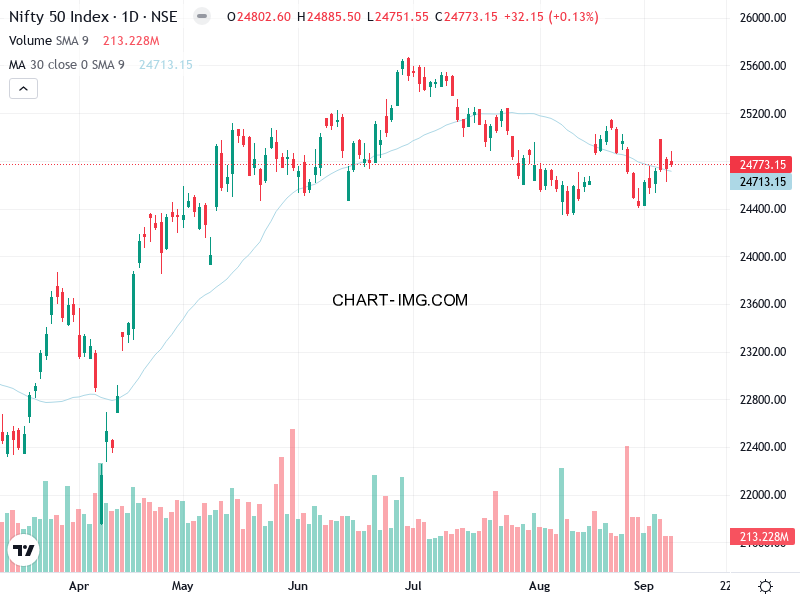

Request Payload for 1h, 3M: {'symbol': 'NSE:NIFTY', 'interval': '1h', 'range': '1M', 'studies': [{'name': 'Volume', 'forceOverlay': True}, {'name': 'Moving Average Exponential', 'input': {'length': 9}, 'override': {'Plot.color': 'rgba(0,0,0,1)'}}, {'name': 'Moving Average Exponential', 'input': {'length': 21}, 'override': {'Plot.color': 'rgba(255,165,0,1)'}}]}
Chart image saved successfully as images/NSE_NIFTY_1h_2025-09-08.png


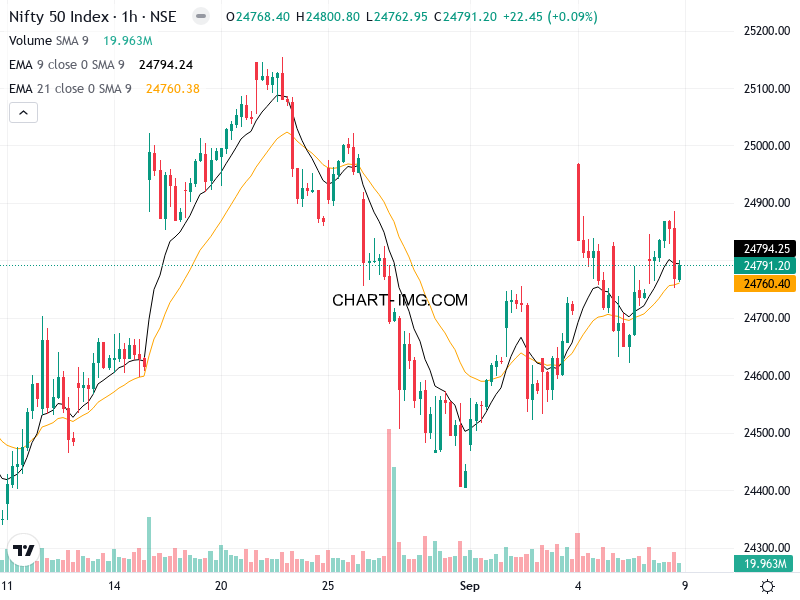

In [10]:
# Example usage
generate_images(symbol="NSE:NIFTY")